#### This example uses Tensorflow to build a multilayer perceptron which has two fully connected hidden layers

##### Author: Varunaditya Jadwal

In [128]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# downloading the MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data

In [92]:
mnist = input_data.read_data_sets('../MNISTdataset', one_hot = False)

Extracting ../MNISTdataset/train-images-idx3-ubyte.gz
Extracting ../MNISTdataset/train-labels-idx1-ubyte.gz
Extracting ../MNISTdataset/t10k-images-idx3-ubyte.gz
Extracting ../MNISTdataset/t10k-labels-idx1-ubyte.gz


In [93]:
learningRate = 0.1
numSteps = 1000
batchSize = 128
displayStep = 100
neuronsHiddenLayer1 = 256
neuronsHiddenLayer2 = 256
neuronsHiddenLayer3 = 256
inputSize = 784
numberOfClasses = 10

In [94]:
def neuralNetwork(data):
    inputLayer = data['images']
    layer1 = tf.layers.dense(inputLayer, neuronsHiddenLayer1)
    layer2 = tf.layers.dense(layer1, neuronsHiddenLayer2)
    layer3 = tf.layers.dense(layer2, neuronsHiddenLayer3)
    outputLayer = tf.layers.dense(layer3, numberOfClasses)
    return outputLayer

In [95]:
def modelFunction(features, labels, mode):
    logits = neuralNetwork(features)
    predClasses = tf.argmax(logits, axis = 1)
    predProbs = tf.nn.softmax(logits)
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode, predictions = predClasses)
    lossTrack = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits,
                                                                             labels = tf.cast(labels, dtype = tf.int32)))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = learningRate)
    trainOptimize = optimizer. minimize(lossTrack, global_step = tf.train.get_global_step())
    accuracy = tf.metrics.accuracy(labels = labels, predictions = predClasses)
    estimatorSpecs = tf.estimator.EstimatorSpec(mode=mode,
                                             predictions = predClasses,
                                             loss = lossTrack,
                                             train_op = trainOptimize,
                                             eval_metric_ops = {'accuracy': accuracy})
    return estimatorSpecs

In [96]:
model = tf.estimator.Estimator(modelFunction)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_master': '', '_service': None, '_is_chief': True, '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_num_worker_replicas': 1, '_save_summary_steps': 100, '_num_ps_replicas': 0, '_model_dir': '/tmp/tmpnf17lm_t', '_train_distribute': None, '_task_id': 0, '_log_step_count_steps': 100, '_evaluation_master': '', '_keep_checkpoint_max': 5, '_task_type': 'worker', '_session_config': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9427774828>, '_global_id_in_cluster': 0, '_tf_random_seed': None}


In [97]:
inputFunction = tf.estimator.inputs.numpy_input_fn(x = {'images' : mnist.train.images}, y = mnist.train.labels,
                                                  batch_size = batchSize, num_epochs = 1000,shuffle = True)

In [106]:
model.train(input_fn = inputFunction, steps = 1500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnf17lm_t/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 2001 into /tmp/tmpnf17lm_t/model.ckpt.
INFO:tensorflow:step = 2001, loss = 0.24051583
INFO:tensorflow:global_step/sec: 172.94
INFO:tensorflow:step = 2101, loss = 0.32152003 (0.579 sec)
INFO:tensorflow:global_step/sec: 199.732
INFO:tensorflow:step = 2201, loss = 0.18570052 (0.501 sec)
INFO:tensorflow:global_step/sec: 179.22
INFO:tensorflow:step = 2301, loss = 0.1571314 (0.558 sec)
INFO:tensorflow:global_step/sec: 192.835
INFO:tensorflow:step = 2401, loss = 0.45436046 (0.518 sec)
INFO:tensorflow:global_step/sec: 195.963
INFO:tensorflow:step = 2501, loss = 0.22117093 (0.510 sec)
INFO:tensorflow:global_step/sec: 199.162
INFO:tensorflow:step = 26

In [103]:
evalFunction = tf.estimator.inputs.numpy_input_fn(x = {'images' : mnist.test.images}, y = mnist.test.labels,
                                                  batch_size = batchSize, shuffle = False)

In [107]:
metrics = model.evaluate(evalFunction)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-06-01-16:58:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnf17lm_t/model.ckpt-3500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-06-01-16:58:16
INFO:tensorflow:Saving dict for global step 3500: accuracy = 0.9186, global_step = 3500, loss = 0.2929571


In [108]:
metrics['accuracy']

0.9186

In [112]:
testImages = mnist.test.images[:5]
predictFunction = tf.estimator.inputs.numpy_input_fn(x = {'images' : testImages}, shuffle = False)
predictions = list(model.predict(input_fn = predictFunction))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpnf17lm_t/model.ckpt-3500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


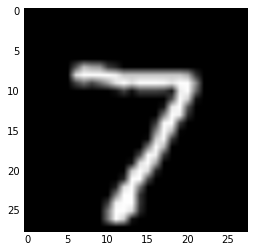

7


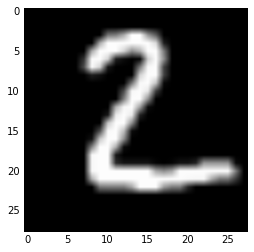

2


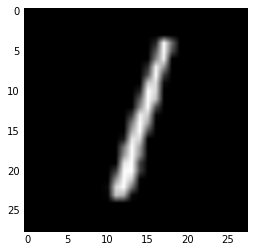

1


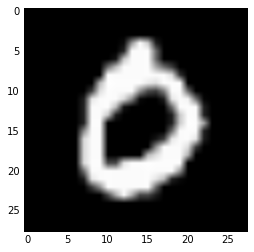

0


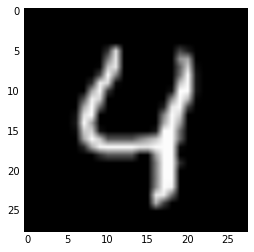

4


In [131]:
for i in range(5):
    plt.imshow(np.reshape(testImages[i], [28,28]), cmap = 'gray')
    plt.show()
    print(predictions[i])